# minuit2GausFit
Perform fits with different configurations using Minuit2




**Author:** Lorenzo Moneta  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:09 AM.</small></i>

 Definition of a helper function: 

In [1]:
%%cpp -d

#include "TH1.h"
#include "TF1.h"
#include "TCanvas.h"
#include "TRandom3.h"
#include "TVirtualFitter.h"
#include "TPaveLabel.h"
#include "TStyle.h"

#include <iostream>
#include <string>


void testGausFit( std::string type = "Minuit2", int n = 1000) {

   gRandom = new TRandom3();

   TVirtualFitter::SetDefaultFitter(type.c_str() );

   std::string name;
   name = "h1_" + type;
   TH1D * h1 = new TH1D(name.c_str(),"Chi2 Fit",100, -5, 5. );
   name = "h2_" + type;
   TH1D * h2 = new TH1D(name.c_str(),"Chi2 Fit with Minos Error",100, -5, 5. );
   name = "h3_" + type;
   TH1D * h3 = new TH1D(name.c_str(),"Chi2 Fit with Integral and Minos",100, -5, 5. );
   name = "h4_" + type;
   TH1D * h4 = new TH1D(name.c_str(),"Likelihood Fit with Minos Error",100, -5, 5. );

   gStyle->SetOptStat(1111111);
   gStyle->SetOptFit(1111111);

   for (int i = 0; i < n; ++i) {
      double x = gRandom->Gaus(0,1);
      h1->Fill( x );
      h2->Fill( x );
      h3->Fill( x );
      h4->Fill( x );
   }

   std::string cname = type + "Canvas" ;
   std::string ctitle = type + " Gaussian Fit" ;
   TCanvas *c1 = new TCanvas(cname.c_str(),cname.c_str(),10,10,900,900);
   c1->Divide(2,2);

   c1->cd(1);
   std::cout << "\nDo Fit 1\n";
   h1->Fit("gaus","Q");
   h1->Draw();
   c1->cd(2);
   std::cout << "\nDo Fit 2\n";
   h2->Fit("gaus","E");
   h2->Draw();
   c1->cd(3);
   std::cout << "\nDo Fit 3\n";
   h3->Fit("gaus","IGE");
   h3->Draw();
   c1->cd(4);
   std::cout << "\nDo Fit 4\n";
   h4->Fit("gaus","LE");
   h4->Draw();

}

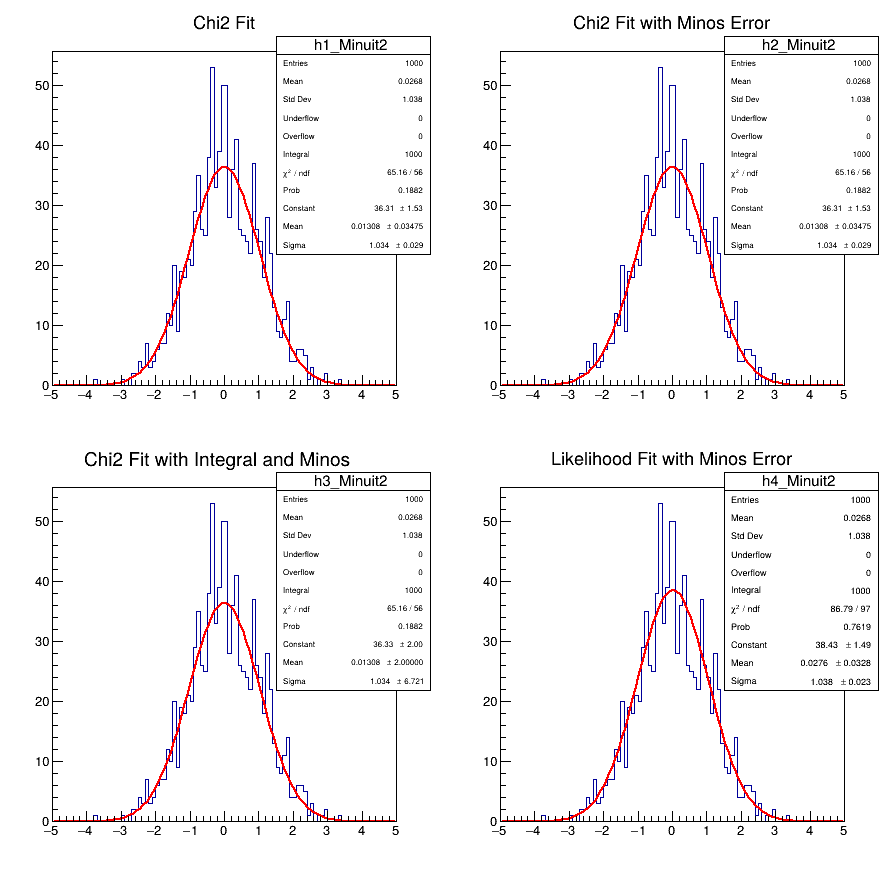


Do Fit 1

Do Fit 2
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      65.1586
NDf                       =           56
Edm                       =  1.93774e-09
NCalls                    =           69
Constant                  =      36.3132   +/-   1.52625       -1.51651     +1.53547      (Minos) 
Mean                      =     0.013082   +/-   0.0347499     -0.0347674   +0.0347613    (Minos) 
Sigma                     =      1.03413   +/-   0.0288039     -0.0286274   +0.0290102    (Minos)  	 (limited)

Do Fit 3
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      65.1586
NDf                       =           56
Edm                       =  6.86315e-08
NCalls                    =           57
Constant                  =       36.327   +/-   2             -1.51685     +1.53726      (Minos) 
Mean                      =    0.0130817   +/-   2           
Sigma                     =   

In [2]:
int n = 1000;
testGausFit("Minuit2",n);
testGausFit("Fumili2",n);

Draw all canvases 

In [3]:
%jsroot on
gROOT->GetListOfCanvases()->Draw()